In [1]:
# Figure1(A-D)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.font_manager import FontProperties
import pyscisci.all as pyscisci
from brokenaxes import brokenaxes
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from scipy import stats
from scipy.stats import norm, ks_2samp
from adjustText import adjust_text
# 定义字体
EF = FontProperties(family = 'DejaVu Sans')

%matplotlib inline

In [2]:
main_path = r'/home/20250114zmz_kd/'

In [3]:
AnnualDistribution = r'Co-utilization/2-Revision202501-DataVisualize/0-AnnualDistribution.csv'
ad = pd.read_csv(main_path+AnnualDistribution)
del ad['Unnamed: 0']
print(ad .shape)
ad .columns

(98, 4)


Index(['PublishedYear', 'C1N0', 'numpub_sum', 'numfacility_avg'], dtype='object')

In [4]:
ad1 = ad.pivot(index = 'PublishedYear', columns = 'C1N0', values = 'numpub_sum').reset_index()
ad1 = ad1 .fillna(0)
ad1 = ad1 .rename(columns = {0:'single_pub',1:'co_pub'})
print(ad1 .shape)
ad1 .columns

(61, 3)


Index(['PublishedYear', 'single_pub', 'co_pub'], dtype='object', name='C1N0')

In [5]:
NumfacilityDistribution = r'Co-utilization/2-Revision202501-DataVisualize/0-NumfacilityDistribution.csv'
nfd = pd.read_csv(main_path+NumfacilityDistribution)
del nfd['Unnamed: 0']
print(nfd .shape)
nfd .columns

(7, 2)


Index(['numfacility', 'numpub_sum'], dtype='object')

In [6]:
NumPub_Combinations = r'Co-utilization/2-Revision202501-DataVisualize/0-NumPub_Combinations.csv'
npc = pd.read_csv(main_path+NumPub_Combinations)
del npc['Unnamed: 0']
print(npc .shape)
npc .columns

(411, 2)


Index(['Facility_Pair', 'numpub_combine'], dtype='object')

In [7]:
AnnualCombine = r'Co-utilization/2-Revision202501-DataVisualize/0-annual_combine.csv'
ac = pd.read_csv(main_path+AnnualCombine)
del ac['Unnamed: 0']
print(ac .shape)
ac .columns

(37, 3)


Index(['PublishedYear', 'num_combin', 'num_new_combin'], dtype='object')

/tmp/ipykernel_3135907/3526608302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df00['Co-utilizedRatio'] = df00['co_pub']/(df00['co_pub'] + df00['single_pub'])
/tmp/ipykernel_3135907/3526608302.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df00['Co-utilizedRatio'] = df00['Co-utilizedRatio'].fillna(0)


0.8716858954890793 -1.7147956026461364 1.851790279663854e-184


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


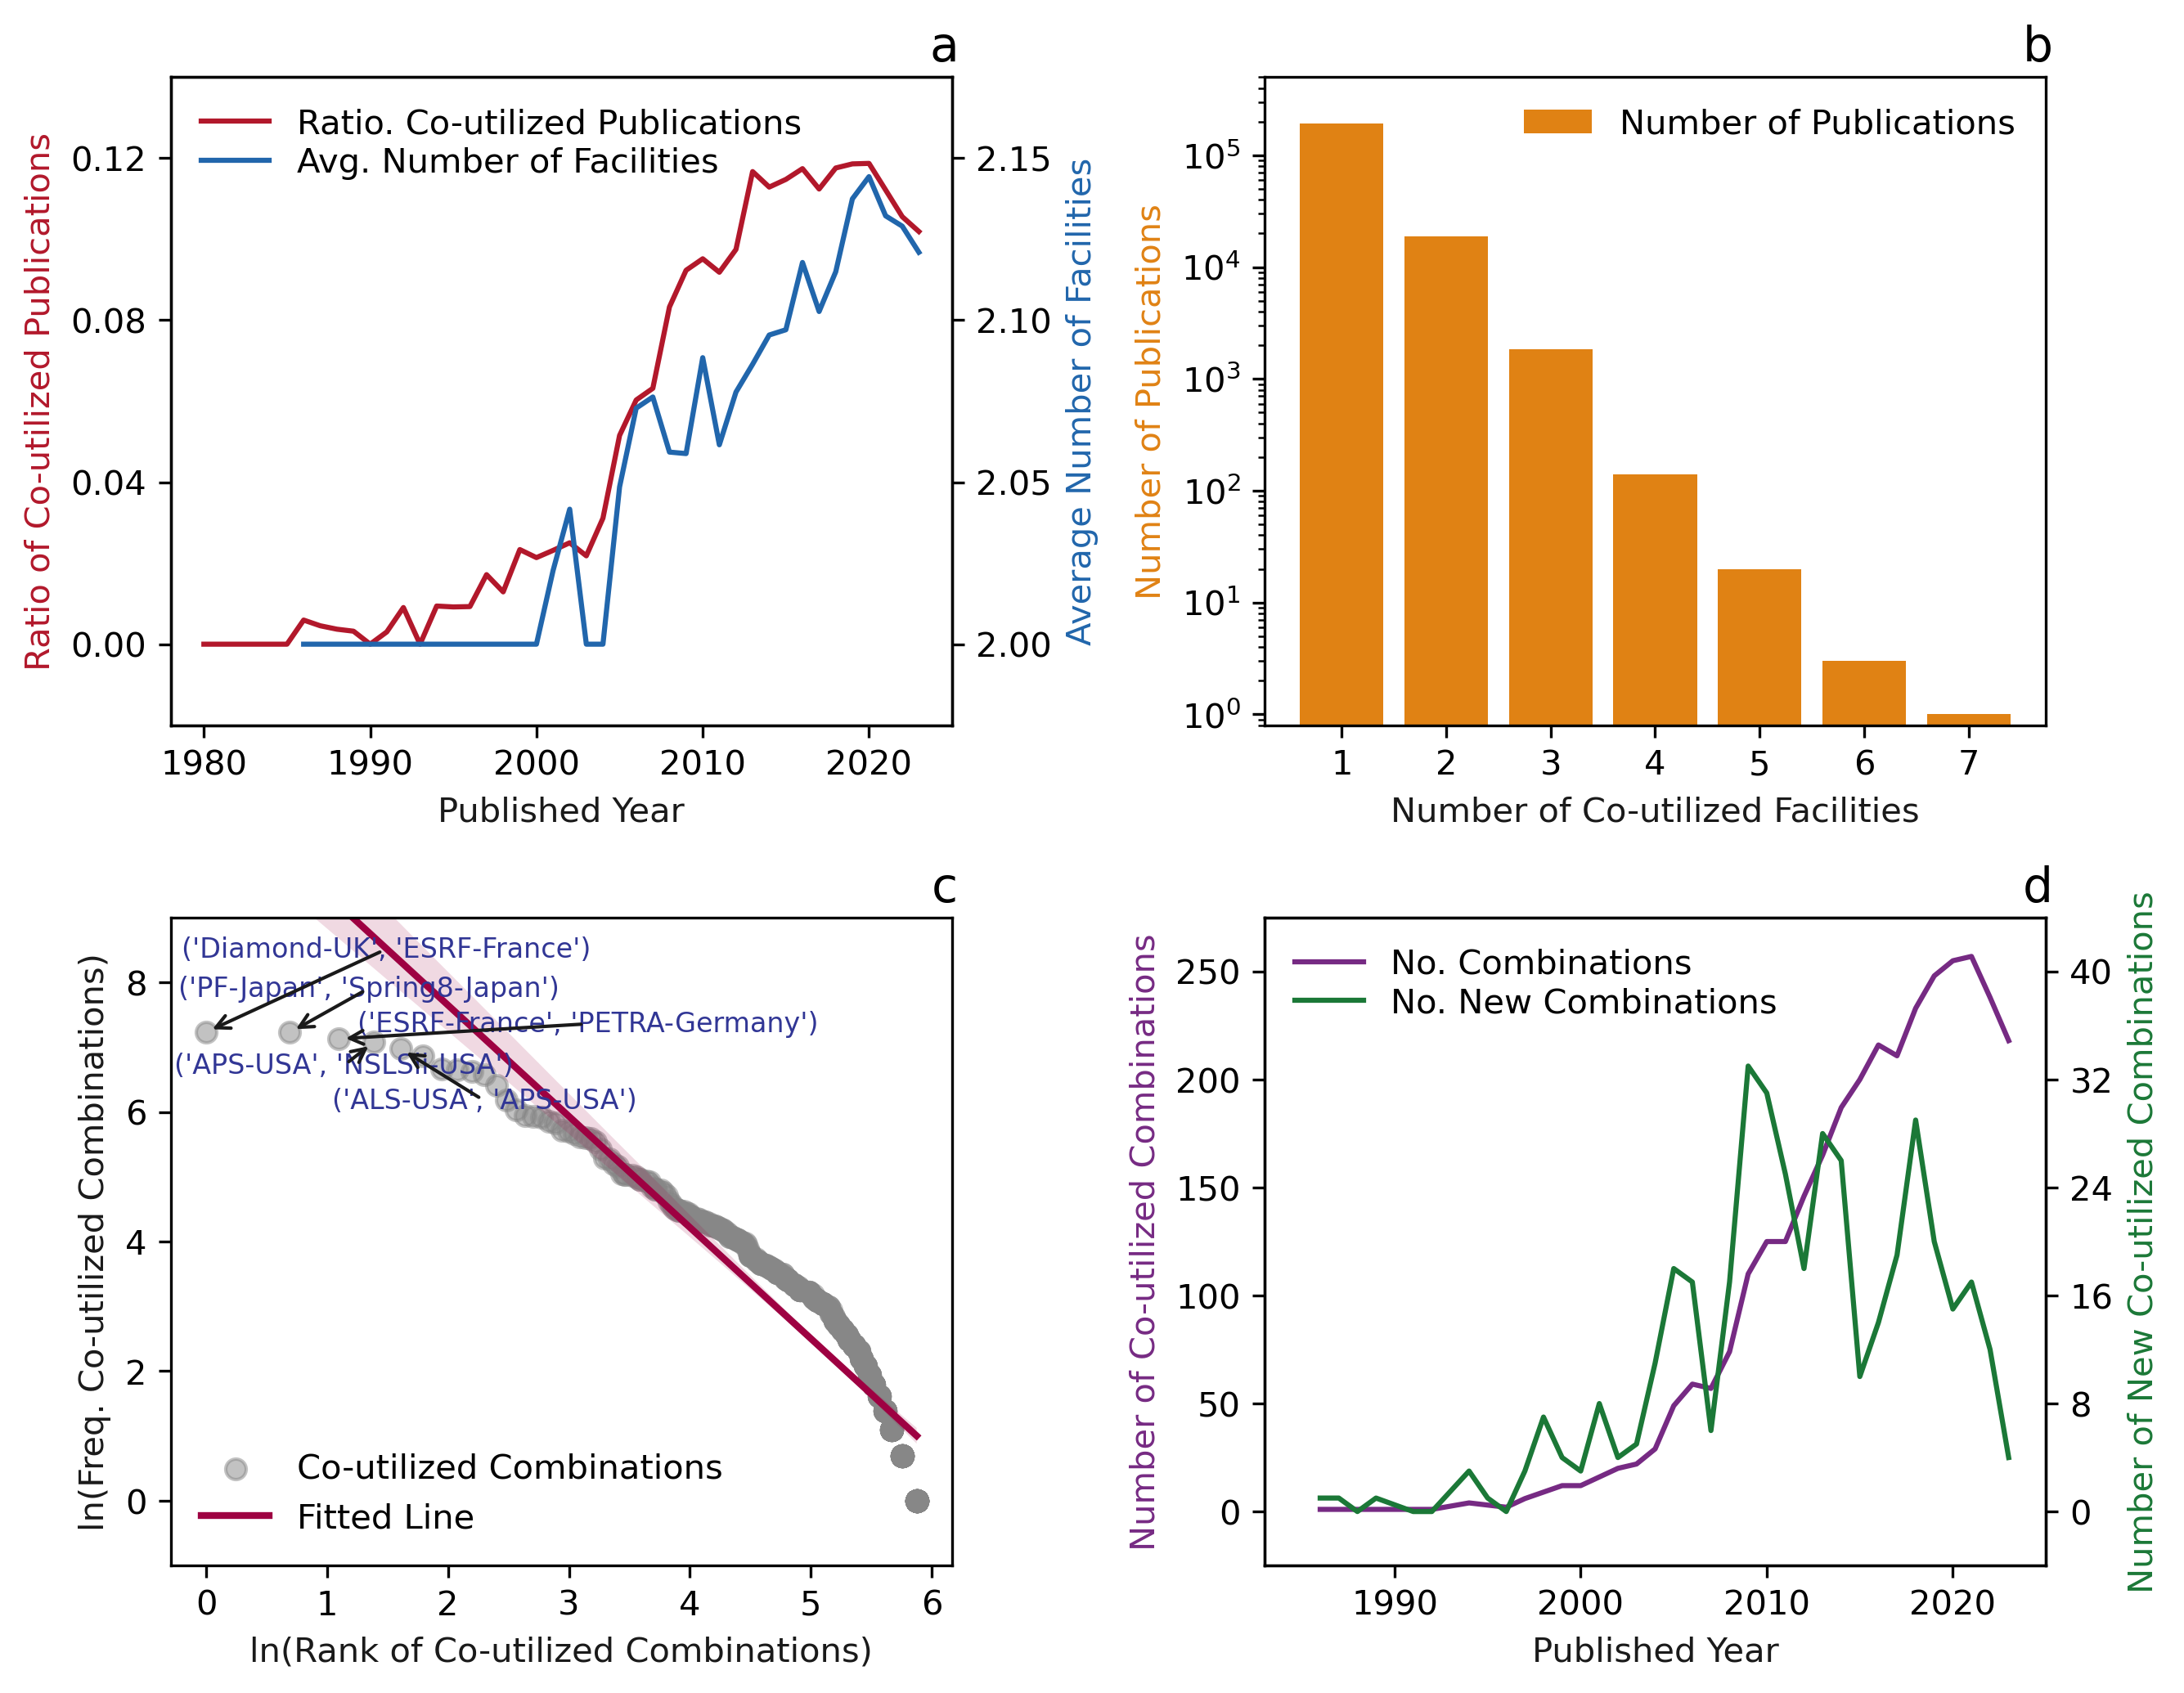

In [8]:
fig, axes = plt.subplots(2,2, figsize = (9,7), dpi = 300)

df00 = ad1
df00 = df00[(df00['PublishedYear']<=2023)&(df00['PublishedYear']>=1980)]

df00['Co-utilizedRatio'] = df00['co_pub']/(df00['co_pub'] + df00['single_pub'])
df00['Co-utilizedRatio'] = df00['Co-utilizedRatio'].fillna(0)

df01 = ad[['PublishedYear','numfacility_avg','C1N0']].drop_duplicates(subset = ['PublishedYear','C1N0'])
df01 = df01[df01['C1N0']==1]
# print(df01)
df01 = df01[df01['PublishedYear']<=2023]
axes[0,0]. plot(df00['PublishedYear'], df00['Co-utilizedRatio'], color = '#b2182b', label = 'Ratio. Co-utilized Publications')
ax0 = axes[0,0].twinx()
ax0. plot(df01['PublishedYear'], df01['numfacility_avg'], color = '#2166ac', label = 'Avg. Number of Facilities')
axes[0,0].xaxis.set_major_locator(MultipleLocator(10))
axes[0,0].set_ylim(-0.02, 0.14)
axes[0,0].set_xlim(1978, 2025)
axes[0,0].set_xlabel('Published Year', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,0].yaxis.set_major_locator(MultipleLocator(0.04))
axes[0,0].set_ylabel('Ratio of Co-utilized Publications', fontsize=10, fontproperties=EF, color='#b2182b')
ax0.set_ylabel('Average Number of Facilities', fontsize=10, fontproperties=EF, color='#2166ac')
ax0.set_ylim(1.975, 2.175)
ax0.yaxis.set_major_locator(MultipleLocator(0.05))
axes[0,0].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper left', bbox_to_anchor=(0, 1))
ax0.legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper left', bbox_to_anchor=(0, 0.94))

df10 = nfd
axes[0,1].bar(df10['numfacility'], df10['numpub_sum'], label = 'Number of Publications', color = '#e08214')
axes[0,1].set_yscale('log')
axes[0,1].set_ylabel('Number of Publications', fontsize=10, fontproperties=EF, color='#e08214')
axes[0,1].set_xlabel('Number of Co-utilized Facilities', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,1].xaxis.set_major_locator(MultipleLocator(1))
axes[0,1].set_ylim(0.8, 500000)
axes[0,1].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')


df20 = npc
df20['rank'] = df20['numpub_combine'].rank(method='min', ascending=False)
# 对 x 和 y 数据取对数
df20['log_rank'] = np.log(df20['rank'])
df20['log_numpub_combine'] = np.log(df20['numpub_combine'])
# 使用 scipy.linregress 计算拟合线的斜率、截距和R2
slope, intercept, r_value, p_value, std_err = stats.linregress(df20['log_rank'], df20['log_numpub_combine'])
print(r_value**2, slope, p_value)
# 计算拟合线的y值（y = mx + b）
fitted_line = slope * df20['log_rank'] + intercept
# 创建散点图
axes[1,0].scatter(df20['log_rank'], df20['log_numpub_combine'], color='#878787', alpha=0.5, label='Co-utilized Combinations')
# 拟合对数变换后的数据
sns.regplot(data=df20, x='log_rank', y='log_numpub_combine',
            scatter=False, line_kws={'color': '#9e0142', 'lw': 2}, ci=95, ax=axes[1,0], label='Fitted Line')
# 设置标签和标题
axes[1,0].set_xlabel('ln(Rank of Co-utilized Combinations)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,0].set_ylabel('ln(Freq. Co-utilized Combinations)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,0].set_ylim(-1, 9)
axes[1,0].yaxis.set_major_locator(MultipleLocator(2))
# 标记排名前 5 的点
top = 5  # 选择排名前 5
top_points = df20.sort_values(by = 'log_numpub_combine', ascending = False).head(top)  # 获取排名前 5 的数据
# 创建文本标签
texts = []
for i, row in top_points.iterrows():
    text = axes[1,0].text(row['log_rank'], row['log_numpub_combine'], 
                       f'{row["Facility_Pair"]}', fontsize=8, color='#313695', fontproperties=EF, ha='center', va='center')
    texts.append(text)
# 自动调整文本位置
adjust_text(texts, ax=axes[1,0], force_points=0.3, expand_text=0.2, arrowprops=dict(arrowstyle="->", color='#1a1a1a', lw=1))
axes[1,0].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='lower left')

df30 = ac.sort_values(by = 'PublishedYear', ascending = True)
df30 = df30[(df30['PublishedYear']<=2023)&(df30['PublishedYear']>=1980)]
# df31 = ac.sort_values(by = 'PublishedYear', ascending = True)
# df31 = df31[(df31['PublishedYear']<=2023)&(df31['PublishedYear']>=1980)]
axes[1,1]. plot(df30['PublishedYear'], df30['num_combin'], color = '#762a83', label = 'No. Combinations')
ax3 = axes[1,1].twinx()
ax3. plot(df30['PublishedYear'], df30['num_new_combin'], color = '#1b7837', label = 'No. New Combinations')
axes[1,1].xaxis.set_major_locator(MultipleLocator(10))
axes[1,1].set_ylim(-25, 275)
axes[1,1].set_xlim(1983, 2025)
axes[1,1].set_xlabel('Published Year', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,1].yaxis.set_major_locator(MultipleLocator(50))
axes[1,1].set_ylabel('Number of Co-utilized Combinations', fontsize=10, fontproperties=EF, color='#762a83')
ax3.set_ylabel('Number of New Co-utilized Combinations', fontsize=10, fontproperties=EF, color='#1b7837')
axes[1,1].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper left', bbox_to_anchor=(0, 1))
ax3.legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper left', bbox_to_anchor=(0, 0.94))
ax3.set_ylim(-4, 44)
ax3.yaxis.set_major_locator(MultipleLocator(8))

for i, ax in enumerate(axes.flat):
    ax.text(0.99, 1.01, chr(97 + i), transform=ax.transAxes, 
            fontsize=14, verticalalignment='bottom', horizontalalignment='center')


plt.tight_layout()
plt.savefig(main_path + r'Co-utilization/2-Revision202501-DataVisualize/0-Figure-2.png', bbox_inches='tight')
plt.show()